In [124]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [125]:
df_fuji = pd.read_csv("../../../DataSet/Fuji/fuji.csv")
df_fuji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Fuji    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [126]:
df_fuji["Date"] = pd.to_datetime(df_fuji["Date"], format="%d/%m/%Y")
df_fuji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Fuji    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


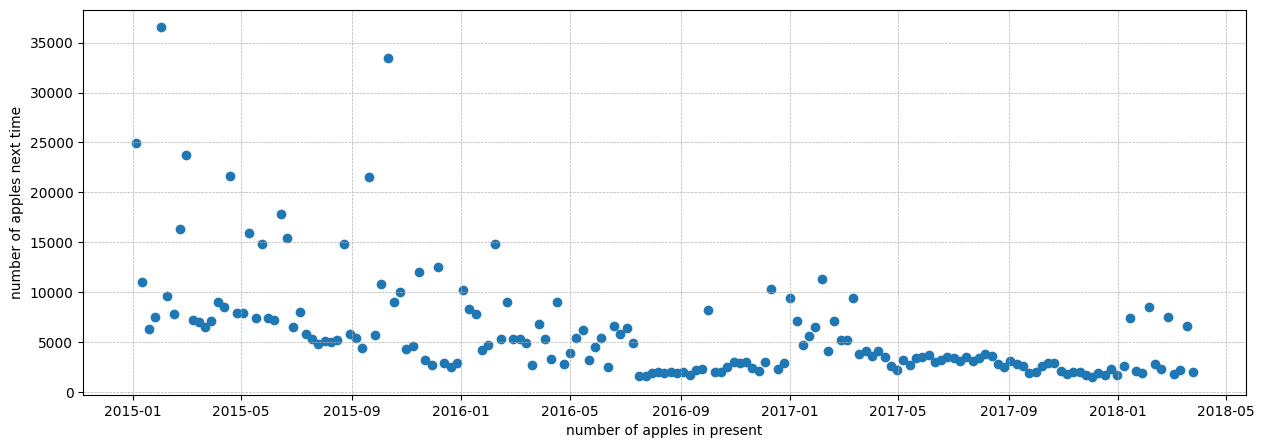

In [127]:
plt.figure(figsize=(15,5))
plt.scatter(df_fuji["Date"], df_fuji["Fuji"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [128]:
df_fuji = df_fuji[df_fuji["Fuji"] <= 10000]

In [129]:
df_fuji["y"] = df_fuji["Fuji"].shift(-1)
df_fuji.dropna(inplace=True)
df_fuji.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 2 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    147 non-null    datetime64[ns]
 1   Fuji    147 non-null    int64         
 2   y       147 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.6 KB


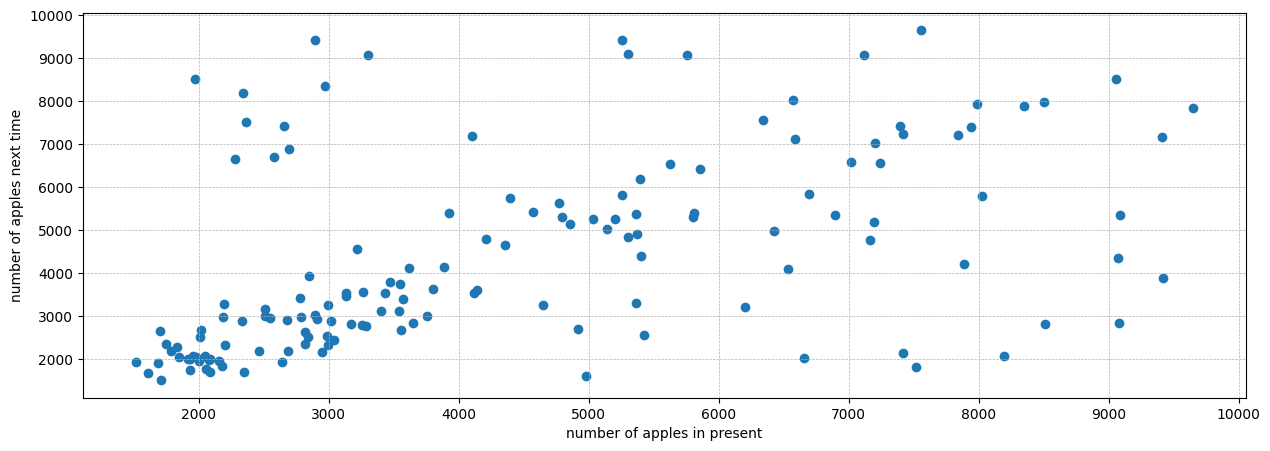

In [130]:
plt.figure(figsize=(15,5))
plt.scatter(df_fuji["Fuji"], df_fuji["y"])
plt.xlabel("number of apples in present")
plt.ylabel("number of apples next time")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [131]:
feature_fuji = np.array(df_fuji.drop(columns="y"))
label_fuji = np.array(df_fuji.drop(columns="Fuji"))

In [132]:
def writeEvaluate(model, mae:np.float64, mse:np.float64, r2:np.float64, mape:np.float64, filename):
    df = pd.read_csv(filename)
    row_index = df.index.get_loc(df.loc[df['Model'] == model].index[0])
    df.at[row_index,'Mae'] = mae
    df.at[row_index,'Mse'] = mse
    df.at[row_index,'R2'] = r2
    df.at[row_index,'Mape'] = mape

    df.to_csv(filename,encoding='utf-8', sep=',', index=False)

In [133]:
# def findBestRandomState(r,t, x, y):
#     xScaler = StandardScaler().fit(x)
#     yScaler = StandardScaler().fit(y)
#     x = xScaler.transform(x)
#     y = yScaler.transform(y)
    
#     random = 0
#     a = 100

#     model = LinearRegression()
#     for _ in range(r,t):
#         x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
#         model.fit(x_train, y_train)

#         y_predict = model.predict(x_test)
#         if (buff := mean_absolute_error(y_test, y_predict)) < a:
#             a = buff
#             random = _
#     print(a, random)

# findBestRandomState(0, 100000, feature_fuji[:, 1:], label_fuji[:, 1:])

#Seed = 762701 with mean absolute error

In [134]:
feature_fuji_train, feature_fuji_test, label_fuji_train, label_fuji_test = train_test_split(feature_fuji, label_fuji, random_state=84801)

feature_fuji_train = np.array(sorted(feature_fuji_train, key=lambda x: x[0]))
feature_fuji_test = np.array(sorted(feature_fuji_test, key=lambda x: x[0]))
label_fuji_train = np.array(sorted(label_fuji_train, key=lambda x: x[0]))
label_fuji_test = np.array(sorted(label_fuji_test, key=lambda x: x[0]))

model = LinearRegression()
model.fit(feature_fuji_train[:, 1:], label_fuji_train[:, 1:])

LinearRegression()

Mean Absolute Error: 847.2398958638322
Mean Square Error: 1024202.2342498314
R2 score: 0.5788077868818657
Mean Absolute Percentage Error: 0.26184001767483894


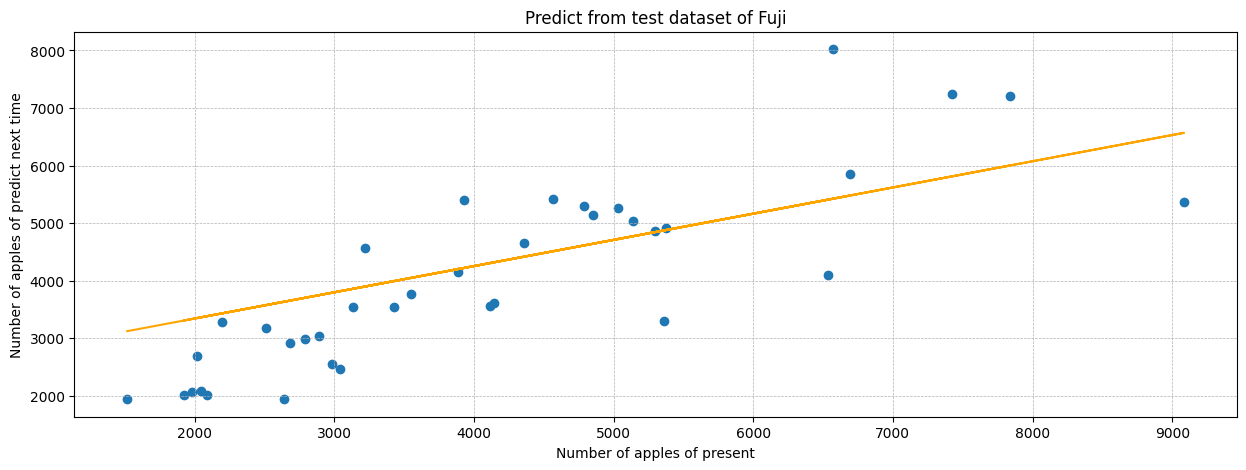

In [135]:
y_predict = model.predict(feature_fuji_test[:, 1:])
mae = mean_absolute_error(label_fuji_test[:, 1:], y_predict)
mse = mean_squared_error(label_fuji_test[:, 1:], y_predict)
r2 = r2_score(label_fuji_test[:, 1:], y_predict)
mape = mean_absolute_percentage_error(label_fuji_test[:, 1:], y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"R2 score: {r2}")

print(f"Mean Absolute Percentage Error: {mape}")

writeEvaluate("Linear",mae,mse,r2,mape,"evaluate.csv")

plt.figure(figsize=(15,5))
plt.scatter(feature_fuji_test[:, 1:], label_fuji_test[:, 1:])
plt.plot(feature_fuji_test[:, 1:], y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Fuji")
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

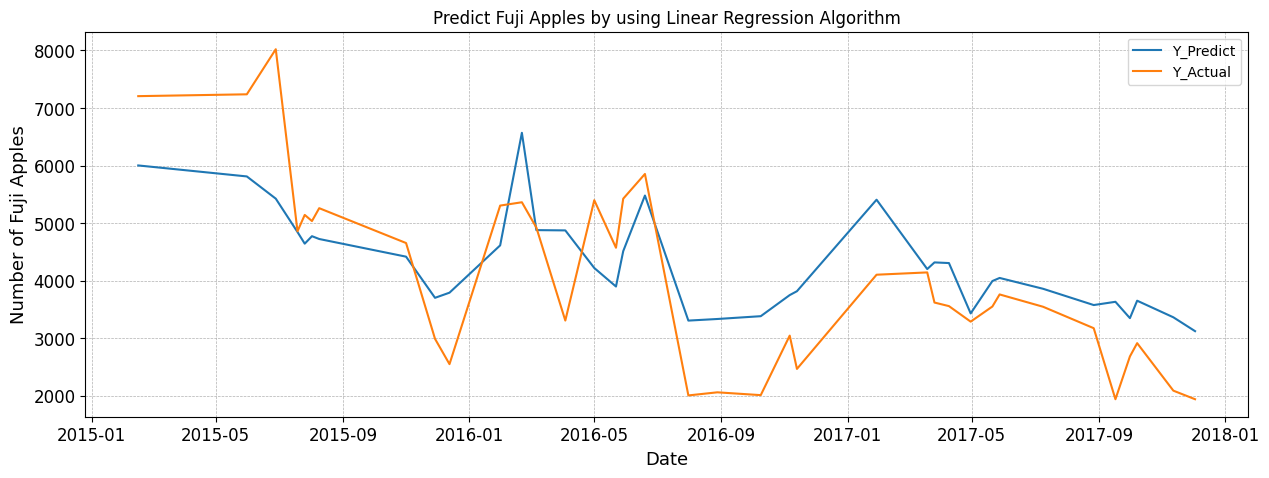

In [136]:
plt.figure(figsize=(15, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(feature_fuji_test[:, :1], y_predict, label="Y_Predict")
plt.plot(feature_fuji_test[:,:1], label_fuji_test[:, 1:], label="Y_Actual")
plt.xlabel("Date", fontsize=13)
plt.ylabel("Number of Fuji Apples", fontsize=13)
plt.title("Predict Fuji Apples by using Linear Regression Algorithm")
plt.grid(linestyle='--', linewidth=0.5)
plt.legend()
plt.show()